In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "file:///C:/Users/nagia/Desktop/CCGENERAL.csv"
df = pd.read_csv(file_path)
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [6]:
# Data Preprocessing
# Drop irrelevant columns if needed
data.drop(columns=['CUST_ID'], inplace=True)

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Feature Selection
selected_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 
                     'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
                     'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
                     'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
                     'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 
                     'TENURE']

C:\Users\nagia\AppData\Local\Temp\ipykernel_40640\1550627158.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
# Clustering Model
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

In [8]:
# Model Evaluation
silhouette = silhouette_score(scaled_data, data['cluster'])
davies_bouldin = davies_bouldin_score(scaled_data, data['cluster'])
calinski_harabasz = calinski_harabasz_score(scaled_data, data['cluster'])
inertia = kmeans.inertia_

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Inertia:", inertia)

Silhouette Score: 0.1546617600452305
Davies-Bouldin Index: 1.8779060538264856
Calinski-Harabasz Index: 1350.10655432972
Inertia: 104732.27430083022


C:\Users\nagia\AppData\Local\Temp\ipykernel_40640\2985536090.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['cluster'], shade=True)


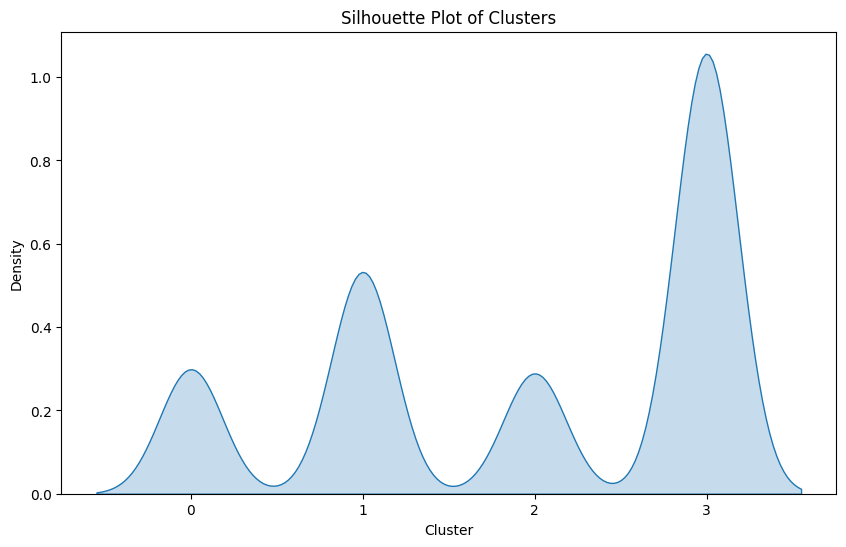

In [9]:
# Silhouette Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['cluster'], shade=True)
plt.title('Silhouette Plot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Density')
plt.show()

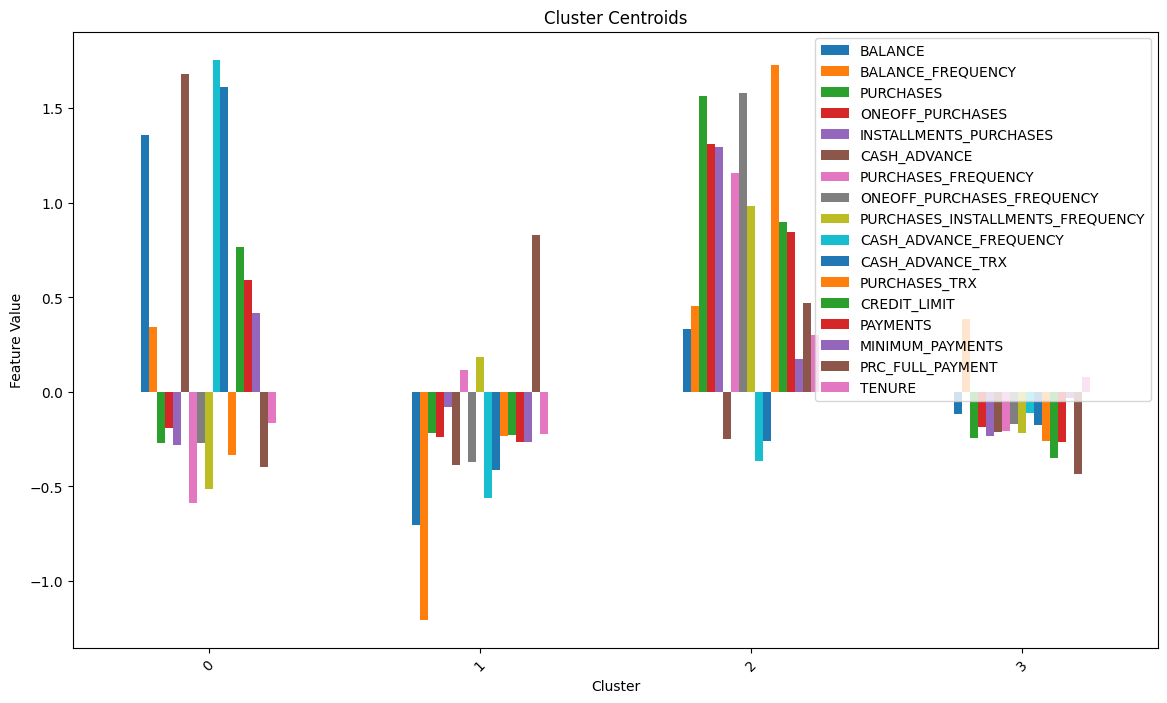

In [10]:
# Cluster Centroids
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=selected_features)
centroid_df.plot(kind='bar', figsize=(14, 8))
plt.title('Cluster Centroids')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.xticks(rotation=45)
plt.show()

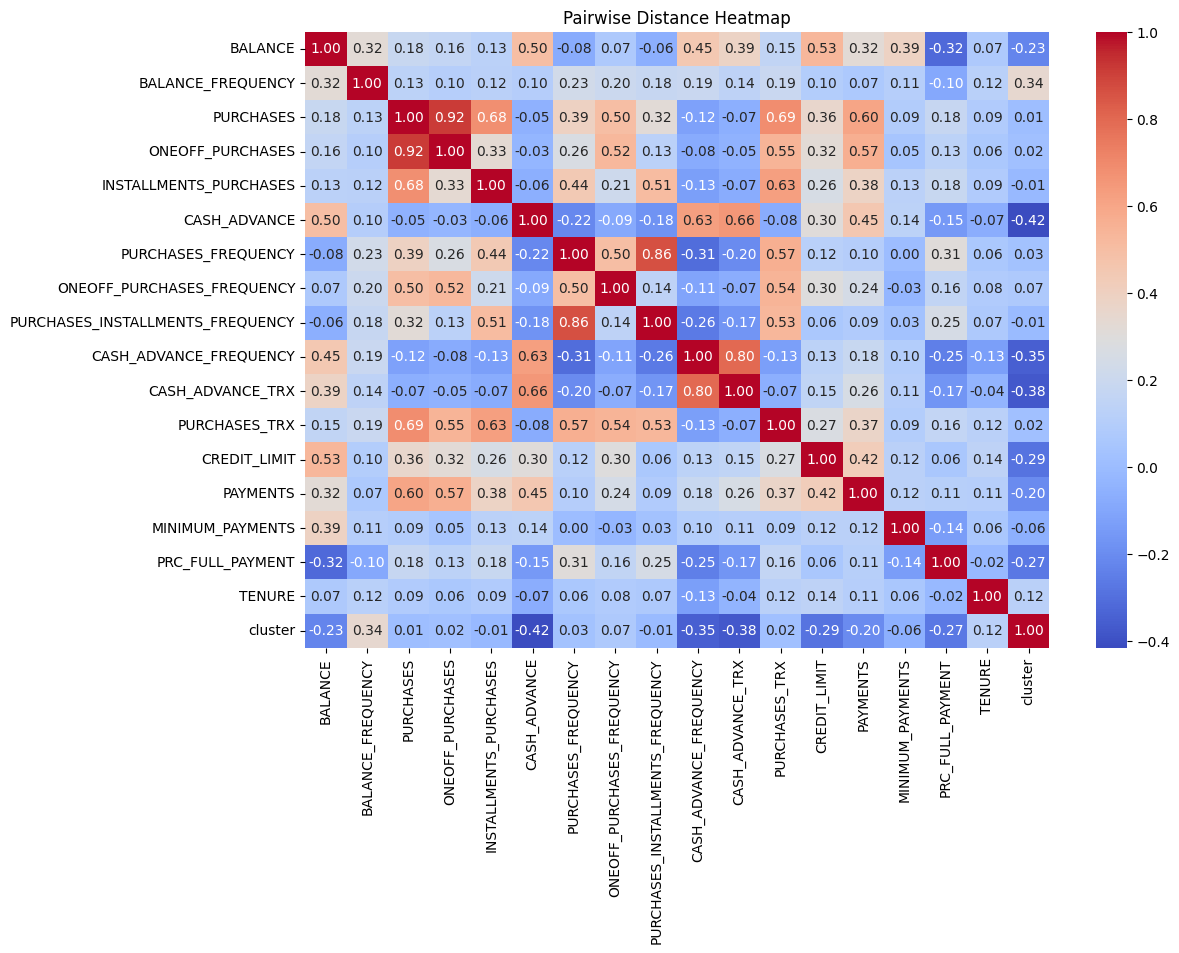

In [11]:
# Pairwise Distance Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Distance Heatmap')
plt.show()

In [13]:
# Cluster Profiles
cluster_profiles = data.groupby('cluster').mean()
print(cluster_profiles)




             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
0        4388.585982           0.958160   430.237014        272.332107   
1          97.330680           0.592352   536.019260        198.981384   
2        2252.202859           0.984528  4344.905463       2765.407980   
3        1316.713555           0.968627   486.838886        287.003541   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    157.987632   4505.338768             0.254609   
1                    337.411782    169.103961             0.536412   
2                   1580.002534    455.634632             0.955033   
3                    200.103872    532.314134             0.406754   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                      

In [14]:
# Show dataset with added cluster column
print(data.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                